In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn import preprocessing 
from sklearn import cluster
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import LabelEncoder
from IPython.display import display
from IPython.display import display_html

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


Bad key "text.kerning_factor" on line 4 in
C:\Users\darwan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


# data preprocessing

他的column name是用category num來表示，就意義上來說不好理解，所以先把column_name換掉。

另外user跟index的意思一樣，所以直接刪掉。

而最後面有一個Unnamed: 25是資料說明沒有提到的，所以也刪掉。

至於空缺值是直接幫他補0，想法是猜測沒資料的原因是那位使用者根本就沒有關心過這個category相關的東西。

而事實上空缺的數量也非常少，所以估計影響不大

剩下就是category11的type不是float要注意而已

In [2]:
df=pd.read_csv("google_review_ratings.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 11  5456 non-null   object 
 12  Category 12  5455 non-null   float64
 13  Category 13  5456 non-null   float64
 14  Category 14  5456 non-null   float64
 15  Category 15  5456 non-null   float64
 16  Category 16  5456 non-null   float64
 17  Category 17  5456 non-null   float64
 18  Category 18  5456 non-null   float64
 19  Catego

In [3]:
df.describe()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000,2.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,...,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560755,1.810000
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,...,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171756,1.088944
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.040000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,...,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000,1.425000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,...,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000,1.810000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,...,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000,2.195000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.580000


In [4]:
df=pd.read_csv("google_review_ratings.csv")
column_name=['churches',
             'resorts',
             'beaches',
             'parks',
             'theatres',
             'museums',
             'malls',
             'zoo',
             'restaruants',
             'pubs/bars',
             'local services',
             'burger/pizza shops',
             'hotels/others lodgings',
             'juice bars',
             'art galleries',
             'dance clubs',
             'swimming pools',
             'gyms',
             'bakeries',
             'beauty&spas',
             'cafes',
             'view points',
             'monuments',
             'gardens']
df=df.drop(columns=['User','Unnamed: 25'])
df.columns=column_name
df=df.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   churches                5456 non-null   float64
 1   resorts                 5456 non-null   float64
 2   beaches                 5456 non-null   float64
 3   parks                   5456 non-null   float64
 4   theatres                5456 non-null   float64
 5   museums                 5456 non-null   float64
 6   malls                   5456 non-null   float64
 7   zoo                     5456 non-null   float64
 8   restaruants             5456 non-null   float64
 9   pubs/bars               5456 non-null   float64
 10  local services          5456 non-null   object 
 11  burger/pizza shops      5456 non-null   float64
 12  hotels/others lodgings  5456 non-null   float64
 13  juice bars              5456 non-null   float64
 14  art galleries           5456 non-null   

意外找到的詭異值，也設成0，並且順便把這欄也改成float

In [5]:
df.iloc[2712,10]

'2\t2.'

In [6]:
df.iloc[2712,10]=0
df['local services']=df['local services'].astype(float)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   churches                5456 non-null   float64
 1   resorts                 5456 non-null   float64
 2   beaches                 5456 non-null   float64
 3   parks                   5456 non-null   float64
 4   theatres                5456 non-null   float64
 5   museums                 5456 non-null   float64
 6   malls                   5456 non-null   float64
 7   zoo                     5456 non-null   float64
 8   restaruants             5456 non-null   float64
 9   pubs/bars               5456 non-null   float64
 10  local services          5456 non-null   float64
 11  burger/pizza shops      5456 non-null   float64
 12  hotels/others lodgings  5456 non-null   float64
 13  juice bars              5456 non-null   float64
 14  art galleries           5456 non-null   

In [8]:
pd=pd.DataFrame(StandardScaler().fit_transform(df.values))
#normalize it because i use covariance!!

# data analyse
由於這個dataset似乎沒有什麼較特別的attribute適合作為classify的對象，所以分析方向以探討其中任兩個attribute的關聯性為主，而這些資料是關於使用者的偏好，所以我分析的目標在於從這些資訊中分析出對行銷有幫助的訊息。

##### problem:哪些attribute是互相高度相關的資訊，這些attribute是否可以靠其他較相關的attribute預測，這些資訊可以怎麼實際運用。

由於維度太高的clustering沒有圖可以看(跑了也很難知道分的好不好)，所以我先分析任兩個attribute的相關係數，再把相關系數較高的幾組抓出來畫散布圖(順便clustering)，接著嘗試透過其他關聯性較高的attributes來預測這些關聯性較高的。attribute。

##### 哪些attribute是互相高度相關的資訊?

藉由觀察相關係數和共變異數來瞭解相關性

這邊觀察到在中線附近的顏色比較深，不過除了對角線自然完全相關可以理解之外，靠近中線但x!=y的部分為什麼關聯性比較高的原因還沒有想到。

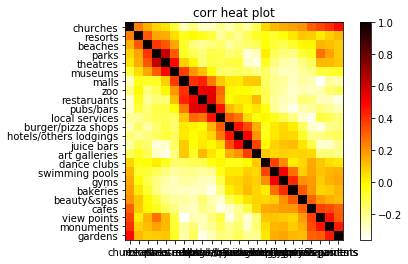

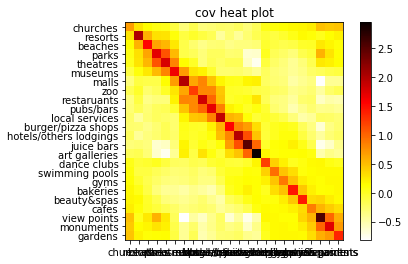

In [9]:
corr_matrix=df.corr()
cov_matrix=df.cov()
fig_1=plt.figure()
ax=fig_1.add_subplot(111)
ax.set_yticks(range(len(column_name)))
ax.set_yticklabels(column_name)
ax.set_xticks(range(len(column_name)))
ax.set_xticklabels(column_name)
im = ax.imshow(corr_matrix, cmap=plt.cm.hot_r)
plt.colorbar(im)
plt.title("corr heat plot")
plt.show()
fig_2=plt.figure()
ax=fig_2.add_subplot(111)
ax.set_yticks(range(len(column_name)))
ax.set_yticklabels(column_name)
ax.set_xticks(range(len(column_name)))
ax.set_xticklabels(column_name)
im = ax.imshow(cov_matrix, cmap=plt.cm.hot_r)
plt.colorbar(im)
plt.title("cov heat plot")
plt.show()

透過分布圖可以看出這些相關係數較高的attribute和他們的使用者分布(有可能大部分的點都是是落在偏都喜歡或偏都不喜歡)

由於attribute數量太多，所以這邊只有挑出相關度較高的來分析

parks with theatres
0.626867812012997


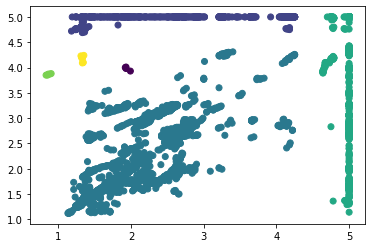

zoo with restaruants
0.5368701971378703


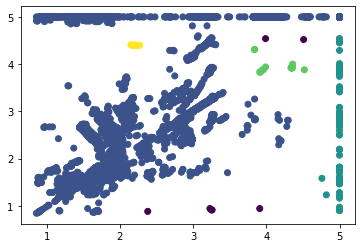

zoo with pubs/bars
0.551409012322358


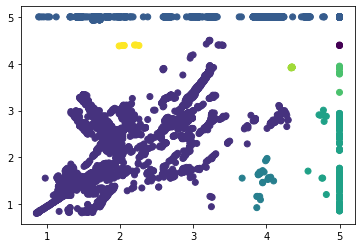

restaruants with pubs/bars
0.564086285741705


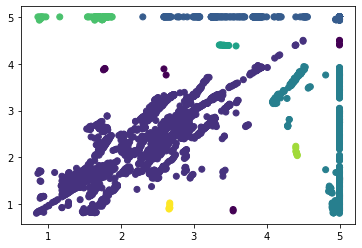

hotels/others lodgings with juice bars
0.5122517687267621


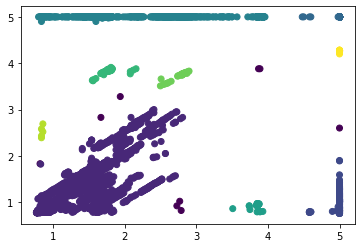

swimming pools with gyms
0.5137931186120819


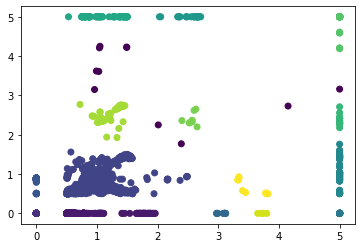

In [10]:
for i in range(23):
    for j in range(23):
        if((corr_matrix.iat[i,j]>=0.5 or corr_matrix.iat[i,j]<=-0.5) and i<j):
            print(df.columns[i],'with',df.columns[j])
            print(corr_matrix.iat[i,j])
            subset=df.iloc[:,[i,j]].to_numpy()
            y_pred = DBSCAN(eps = 0.4, min_samples = 5).fit_predict(subset)
            plt.figure()
            plt.scatter(subset[:, 0], subset[:, 1], c=y_pred)
            plt.show()
        

###### 這些attribute是否可以靠其他較相關的attribute預測?

對於每個attribute都取相關度最高的前兩個attributes來當作feature預測，看看準確度如何。

基本上都有70-80左右的準確率，所以藉由其他attribute去推測某使用者是否是特定attribute的喜歡用戶應該是可行的。

就可以知道把精力花費在這個使用者身上宣傳某些東西是否值得

In [11]:
from sklearn.model_selection import KFold             # 匯入 K 次交叉驗證工具
from sklearn.tree import DecisionTreeClassifier       # 匯入決策樹模型
from sklearn.metrics import accuracy_score            # 匯入準確度計算工具
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import RandomForestRegressor


for i in range(23):
    max1=0
    index1=0
    max2=0
    index2=0
    for j in range(23):
        if(j==i):
            continue
        if(corr_matrix.iat[i,j]>max1):
            index1=j
            max1=corr_matrix.iat[i,j]
        elif(corr_matrix.iat[i,j]>max2):
            index2=j
            max2=corr_matrix.iat[i,j]
    
    print('predict ',df.columns[i],' with features ',df.columns[index1],df.columns[index2])
    train_x=df.iloc[:,[index1,index2]]
    train_y=df.iloc[:,i].round()
    
    kf = KFold(n_splits=3,                                # 設定 K 值
               random_state=1012,
               shuffle=True)
    kf.get_n_splits(train_x)                              # 給予資料範圍

    train_acc_list = []                                   # 儲存每次訓練模型的準確度
    valid_acc_list = []                                   # 儲存每次驗證模型的準確度

    for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
        train_x_split = train_x.iloc[train_index]         # 產生訓練資料
        train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
        valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
        valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤
        """
        model = DecisionTreeClassifier(random_state=1012) # 創造決策樹模型
        model.fit(train_x_split, train_y_split)           # 訓練決策樹模型
        """
        rf=RandomForestClassifier(random_state=2,n_estimators=1000,min_samples_split=20,oob_score=True)
        rf.fit(train_x_split,train_y_split)

        """
        train_pred_y = model.predict(train_x_split)       # 確認模型是否訓練成功
        train_acc = accuracy_score(train_y_split,         # 計算訓練資料準確度
                                   train_pred_y)
        valid_pred_y = model.predict(valid_x_split)       # 驗證模型是否訓練成功
        valid_acc = accuracy_score(valid_y_split,         # 計算驗證資料準確度
                                   valid_pred_y)
        """
        train_pred_y = rf.predict(train_x_split)       
        train_acc = accuracy_score(train_y_split,         
                                   train_pred_y)
        valid_pred_y = rf.predict(valid_x_split)       
        valid_acc = accuracy_score(valid_y_split,         
                                   valid_pred_y)

        train_acc_list.append(train_acc)
        valid_acc_list.append(valid_acc)

    print((
        'average train accuracy: {}\n' +
        '    min train accuracy: {}\n' +
        '    max train accuracy: {}\n' +
        'average valid accuracy: {}\n' +
        '    min valid accuracy: {}\n' +
        '    max valid accuracy: {}').format(
        np.mean(train_acc_list),                          # 輸出平均訓練準確度
        np.min(train_acc_list),                           # 輸出最低訓練準確度
        np.max(train_acc_list),                           # 輸出最高訓練準確度
        np.mean(valid_acc_list),                          # 輸出平均驗證準確度
        np.min(valid_acc_list),                           # 輸出最低驗證準確度
        np.max(valid_acc_list)                            # 輸出最高驗證準確度
    ))

predict  churches  with features  monuments beauty&spas
average train accuracy: 0.8569462937901938
    min train accuracy: 0.8509760791861424
    max train accuracy: 0.8608743469892769
average valid accuracy: 0.8310106436701944
    min valid accuracy: 0.8235294117647058
    max valid accuracy: 0.8444200109950523
predict  resorts  with features  beaches parks
average train accuracy: 0.7599889485163809
    min train accuracy: 0.7569425350563651
    max train accuracy: 0.7624415727247732
average valid accuracy: 0.687134418041401
    min valid accuracy: 0.6827927432655305
    max valid accuracy: 0.6925192519251925
predict  beaches  with features  parks theatres
average train accuracy: 0.7552234181814591
    min train accuracy: 0.7539180643387408
    max train accuracy: 0.757284222100055
average valid accuracy: 0.6988622721535486
    min valid accuracy: 0.6914191419141914
    max valid accuracy: 0.702583837273227
predict  parks  with features  theatres museums
average train accuracy: 0.7850

##### 這些資訊可以怎麼實際運用

我目前可以想到的就是行銷的時候可以在相關性較高的地點設廣告(ex.如果電影院和公園的評價是正相關且散步圖是偏高分的話，新電影可能就可以考慮也在公園做一些宣傳)。

大型商場在規劃區域的時候可以考慮把關聯度較高的放附近，可能消費其中一樣的時候剛好看到另一樣就一起消費了。

或是分析某個使用者是否為某個category的潛在用戶。

其他精準行銷相關問題。